C:\Users\lxy\anaconda3\ano\lib\site-packages\bs4\__init__.py:221: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")


working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working


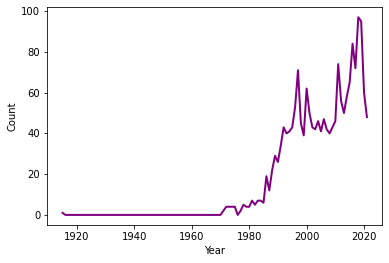

In [1]:
#Extract URLs of all books
import requests
import re
import csv
import pandas as pd
from bs4 import BeautifulSoup
from dateutil.parser import parse
import matplotlib.pyplot as plt
import numpy as np
titlelist=[]
chubanshijianlist=[]
shujilianjielist=[]
for page in range(1,101):
    url = 'https://www.goodreads.com/search?page='+str(page)+'&search%5Bquery%5D=feminism+&tab=books&utf8=%E2%9C%93'
    proxies = {'http': 'http://127.0.0.1:7890'}
    headers = {
        'cookie': 'ccsid=931-9202875-8106515; __gads=ID=55c53155f9b25a20-22ccbf03a2ce0002:T=1636552567:S=ALNI_Mafr7Uaw22Qfz1jF6q_rmt4BE2xFA; __qca=P0-2013600818-1636552569486; locale=zh; _session_id2=644e6e16aca944a3b4a0d85da853c675; blocking_sign_in_interstitial=true',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.69 Safari/537.36 Edg/95.0.1020.44',
        'Referer': 'https://www.goodreads.com/search?page=100&search%5Bquery%5D=feminism+&tab=books&utf8=%E2%9C%93'}
    f = requests.get(url=url, headers=headers).text #Use requests to get all the contents of the webpage
    #f = open('html.txt', encoding='UTF-8').read()
    bs = BeautifulSoup(f, 'html.parser', from_encoding='UTF-8') #Use BeautifulSoup to extract the contents obtained from the webpage
    for i in bs.find_all('tr', itemtype="http://schema.org/Book"): #Analyse all tr modules which itemtype="http://schema.org/Book"
        try:
            title = re.findall('title="(.*?)"', str(i))[0] #Get the booknames that matches the specific format in this module
            shujilianjie = 'https://www.goodreads.com' + \
                           re.findall('<a class="bookTitle" href="(.*?)" itemprop="url">', str(i))[0] #Gets a corresponding open link in this module

            response = requests.get(url=shujilianjie, headers=headers).text #Get the contents in the open link with requests
            #response=open('html2.txt',encoding='UTF-8').read()
            pattern = re.compile('Published(.*?)by', re.S) #Get the publication date in the contents matching the fixed format
            chubanshijian = re.findall(pattern, response)[0].replace('\n', '') #Remove line breaks
            chubanshijian = parse(chubanshijian,fuzzy=True).year #Extract "year" in the publication date with parse
            #print([title, shujilianjie,chubanshijian])
            print('working')
            titlelist.append(title) #Add the title of each book to titlelist
            chubanshijianlist.append(chubanshijian) #Add the publicationdate of each book to publicationlist
            shujilianjielist.append(shujilianjie) #Add the links to each book to the list
        except:
            pass
book_dict={'title':titlelist,'url':shujilianjielist,'publisttime':chubanshijianlist}
df=pd.DataFrame.from_dict(book_dict)


shuliang = [] #Number of publications, which corresponding the "year"
maxvalue = max(chubanshijianlist) #Extract the largest number in the year of publication
minvalue = min(chubanshijianlist) #Extract the smallest number in the year of publication
shijian = np.arange(minvalue,(maxvalue+1)) #Year arrays, which corresponding to the x-axis
print(shijian)
for i in shijian: #Calculate the number of publications per year and put it in the arrays
    shuliang.append(chubanshijianlist.count(i))
plt.plot(shijian,shuliang,lw=2,color='purple') #Set the x-axis, y-axis, line width, color, etc. of the line graph
plt.xlabel('Year') #Name of the x-axis of the line graph
plt.ylabel('Count') #Name of the y-axis of the line graph
plt.show()
